In [1]:
import pandas as pd


binDF = pd.read_csv("dat_log_zscored_bins10", sep = '\t')


In [2]:
modOnc = pd.read_csv("module_onc_131", sep = "\t")

In [3]:
def finalMutualInformation_1(bins,moduleInclusion,binPatientColumn,moduleColumn):
    finalSum = 0
    for i in bins:
        a = (binPatientColumn == i)# first patient
        for j in moduleInclusion: # first module that appears
            b = (moduleColumn == j)
            c = (a&b)
            length = len(binPatientColumn.index)
            sum_c = c.sum()
            sum_a = a.sum()
            sum_b = b.sum()

            d = sum_a / length
            e = sum_b / length
            f = sum_c / length
            finalSum += mutualInformation(f,d,e)

    return finalSum

In [4]:
binDF["modOnc"] = 0
for i in modOnc.iloc[:,0]:
    if i in binDF.index:
        binDF.loc[i, "modOnc"] = 1




In [13]:
binDF.index

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A4GALT',
       'A4GNT', 'AAAS', 'AACS',
       ...
       'ZW10', 'ZWILCH', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=19495)

In [6]:
binDF["modOnc"].value_counts()

0    19311
1      184
Name: modOnc, dtype: int64

In [7]:
binDF


,TCGA-2J-AAB1,TCGA-2J-AAB4,TCGA-2J-AAB6,TCGA-2J-AAB8,TCGA-2J-AAB9,TCGA-2J-AABA,TCGA-2J-AABE,TCGA-2J-AABF,TCGA-2J-AABH,TCGA-2J-AABI,...,TCGA-XD-AAUH,TCGA-XD-AAUI,TCGA-XD-AAUL,TCGA-XN-A8T3,TCGA-XN-A8T5,TCGA-YB-A89D,TCGA-YH-A8SY,TCGA-YY-A8LH,TCGA-Z5-AAPL,modOnc
A1BG,6,2,6,2,8,6,5,5,2,5,...,8,9,7,8,8,9,10,4,7,0
A1BG-AS1,6,2,7,5,9,4,6,8,2,2,...,10,10,7,6,8,8,8,2,9,0
A1CF,3,7,2,5,3,2,1,10,8,1,...,5,9,10,2,1,2,1,5,1,0
A2M,9,7,2,6,10,3,3,7,7,1,...,9,9,9,8,8,10,2,1,4,0
A2M-AS1,2,6,5,8,7,9,6,6,2,10,...,10,7,7,7,6,6,6,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,2,2,5,9,6,5,3,3,4,8,...,2,9,2,2,5,7,5,3,10,0
ZYG11B,3,6,7,7,4,10,4,7,1,1,...,8,4,7,7,6,6,4,1,7,0
ZYX,9,7,10,7,10,5,9,7,8,7,...,6,7,10,7,8,10,10,6,6,0
ZZEF1,5,2,3,2,4,8,2,9,4,4,...,8,3,3,7,7,6,3,3,9,0


,TCGA-2J-AAB1,TCGA-2J-AAB4,TCGA-2J-AAB6,TCGA-2J-AAB8,TCGA-2J-AAB9,TCGA-2J-AABA,TCGA-2J-AABE,TCGA-2J-AABF,TCGA-2J-AABH,TCGA-2J-AABI,...,TCGA-XD-AAUG,TCGA-XD-AAUH,TCGA-XD-AAUI,TCGA-XD-AAUL,TCGA-XN-A8T3,TCGA-XN-A8T5,TCGA-YB-A89D,TCGA-YH-A8SY,TCGA-YY-A8LH,TCGA-Z5-AAPL
A1BG,6,2,6,2,8,6,5,5,2,5,...,9,8,9,7,8,8,9,10,4,7
A1BG-AS1,6,2,7,5,9,4,6,8,2,2,...,9,10,10,7,6,8,8,8,2,9
A1CF,3,7,2,5,3,2,1,10,8,1,...,6,5,9,10,2,1,2,1,5,1
A2M,9,7,2,6,10,3,3,7,7,1,...,9,9,9,9,8,8,10,2,1,4
A2M-AS1,2,6,5,8,7,9,6,6,2,10,...,10,10,7,7,7,6,6,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,2,2,5,9,6,5,3,3,4,8,...,3,2,9,2,2,5,7,5,3,10
ZYG11B,3,6,7,7,4,10,4,7,1,1,...,8,8,4,7,7,6,6,4,1,7
ZYX,9,7,10,7,10,5,9,7,8,7,...,9,6,7,10,7,8,10,10,6,6
ZZEF1,5,2,3,2,4,8,2,9,4,4,...,5,8,3,3,7,7,6,3,3,9


In [8]:
# should I think about vectorization -- doens't matter here because such small values and I just want answer
import math

def mutualInformation(jointDistribution, marginalDistribution1, marginalDistribution2):
    if jointDistribution == 0 or marginalDistribution1 == 0 or marginalDistribution2 == 0:
        return 0
    else:
        return jointDistribution * math.log(jointDistribution / (marginalDistribution1 * marginalDistribution2))
    
anotherBins = [1,2,3,4,5,6,7,8,9,10]
moduleInclusion = [0,1]

def finalMutualInformation(dataframe, bins, moduleInclusion, binPatientColumn, moduleColumn):
    finalSum = 0
    for i in bins:
        a = dataframe.iloc[:, binPatientColumn] == i
        for j in moduleInclusion:
            b = dataframe.iloc[:, moduleColumn] == j
            c = a & b
            length = len(dataframe.index)
            sum_c = c.sum()
            sum_a = a.sum()
            sum_b = b.sum()

            d = sum_a / length
            e = sum_b / length
            f = sum_c / length

            finalSum += mutualInformation(f, d, e)

    return finalSum

In [9]:
pancOncMI = []
compareMI = []
for i in range(177):
    pancOncMI.append(finalMutualInformation(binDF, anotherBins, moduleInclusion, i, 177))
    compareMI.append
    

pancOncMI

[0.0011497782272210807,
 0.0013228791068955036,
 0.001857979679182171,
 0.0005437584007385791,
 0.0009139457139804089,
 0.0005813921269663218,
 0.0009948495019003428,
 0.0005784942853657041,
 0.0009128459593836463,
 0.0008408017417408991,
 0.0005442981016141172,
 0.00108809796739656,
 0.0019186558251699515,
 0.000737604564169529,
 0.00022742485910016123,
 0.001026722190878037,
 0.0013735351138458205,
 0.0006958152161699235,
 0.000522414158497714,
 0.0007115677271801121,
 0.0018232473333808239,
 0.0003312042950349611,
 0.0016593639725207528,
 0.0013321460104042712,
 0.0003055295062096332,
 0.00037286693514001996,
 0.0015575018293395916,
 0.0006714018293864984,
 0.001081121081583561,
 0.002601749679668821,
 0.0032132518941957794,
 0.0020836316871100497,
 0.002556864231400475,
 0.0029954156249251416,
 0.003138952005284153,
 0.001354343724672736,
 0.0015975389311818492,
 0.00019410940624301984,
 0.0012856356415464187,
 0.0012902892417415873,
 0.000471989665991511,
 0.00043435948440882793,


In [10]:
balajiMI = pd.read_csv("mi_values", sep = "\t")

In [11]:
balajiMI['unsigned_mi_package']

0      0.001150
1      0.001323
2      0.001858
3      0.000544
4      0.000914
         ...   
172    0.000662
173    0.000586
174    0.000641
175    0.000699
176    0.001514
Name: unsigned_mi_package, Length: 177, dtype: float64

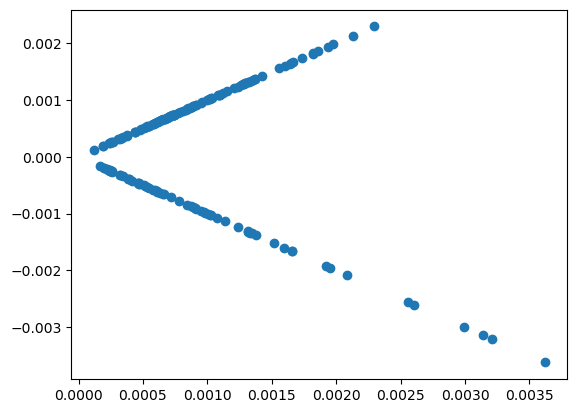

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

plt.scatter(pancOncMI, balajiMI['signed_mi_user'])

In [66]:
print(mutual_info_score(binDF.iloc[:, 0], binDF.iloc[:, 177]))

0.001149778227220219


In [21]:
import pyreadr
a = pyreadr.read_r("brca_quant_0.1_primary_zscore_bins10")
a = a[None]
a

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6,gene
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,7,8,10,8,9,7,8,9,1,5,...,9,10,10,5,10,8,8,10,9,A1BG
A1BG-AS1,6,10,8,6,9,7,10,6,2,6,...,6,7,10,5,8,4,8,8,8,A1BG-AS1
A2M,2,3,4,5,4,6,7,1,10,10,...,2,4,8,5,2,9,8,10,3,A2M
A2M-AS1,7,7,3,2,8,7,5,3,6,9,...,1,8,9,8,8,6,7,10,1,A2M-AS1
A2ML1,3,3,3,2,3,2,3,4,4,3,...,5,6,2,4,4,2,7,3,3,A2ML1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,9,9,10,9,1,1,3,1,2,1,...,2,4,7,4,7,1,9,4,8,ZYG11A
ZYG11B,9,2,1,1,5,2,1,1,9,6,...,3,1,1,1,1,2,3,1,2,ZYG11B
ZYX,6,9,9,10,8,7,8,6,9,6,...,9,8,9,9,10,9,9,9,6,ZYX


In [ ]:
# my mutual information function works, as it matches with balaji's unsigned MI stuff from a while ago

In [ ]:
# goal now: calculate MI with all patients and compare it to his
# second goal: plot that stuff with KM curve
# MI is working fine. so problems could lie with seeing which genes are in the module



In [22]:
myModule = pd.read_csv("exampleModule1.csv")

In [23]:
import numpy as np 
genes = np.intersect1d(myModule.iloc[:, 0], a.index)

In [79]:
print(len(genes))

112


In [24]:
a["myModule"] = 0
for i in myModule.iloc[:,0]:
    if i in a.index:
        a.loc[i, "myModule"] = 1

In [81]:
len(a["myModule"])

17731

In [ ]:
# datatypes
# patient count
# genes


# check sklearn mutual information score with current dataset and compare it to my own function
# print out each step and look at that datatypes

# make sure the casing of genes match

In [25]:
a["myModule"].value_counts()

0    17619
1      112
Name: myModule, dtype: int64

In [89]:
myModule.iloc[:,0]= myModule.iloc[:,0].str.upper()

In [90]:
a.index = a.index.str.upper()

Index(['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1', 'A4GALT', 'AAAS', 'AACS',
       'AACSP1', 'AADAC',
       ...
       'ZW10', 'ZWILCH', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='rownames', length=17731)

In [92]:
genes = np.intersect1d(myModule.iloc[:, 0], a.index)

In [94]:
len(genes)

112

In [19]:
a["myModule"] = 0
for i in myModule.iloc[:,0]:
    if i in a.index:
        a.loc[i, "myModule"] = 1

NameError: name 'a' is not defined

In [105]:
brcaMyMI = []
for i in range(1093):
    brcaMyMI.append(finalMutualInformation(a, anotherBins, moduleInclusion, i, 1094))

In [26]:
brcaPackageMI = []
for i in range(1093):
    brcaPackageMI.append(mutual_info_score(a.iloc[:,i], a.iloc[:,1094]))

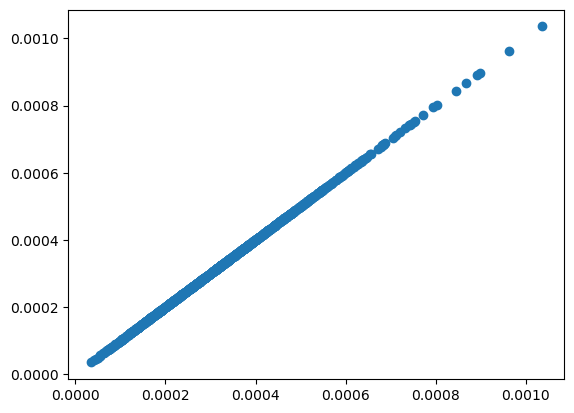

In [108]:
plt.scatter(brcaMyMI, brcaPackageMI)

In [27]:
balajiMPS = pd.read_csv("mps_expression_quant0.1_test", sep = '\t')

ValueError: x and y must be the same size

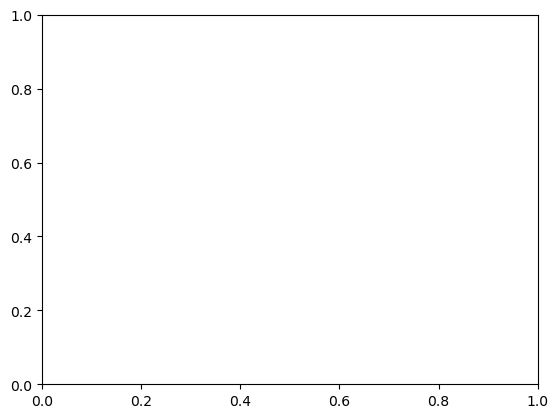

In [29]:
plt.scatter(balajiMPS["MI_signed"], brcaPackageMI)

In [30]:
# need to isolate indexes

b = a.filter(items = balajiMPS['sample_TCGA'])

In [31]:
b["myModule"] = 0
for i in myModule.iloc[:,0]:
    if i in b.index:
        b.loc[i, "myModule"] = 1

In [32]:
brcaPackageMI = []
for i in range(1062):
    brcaPackageMI.append(mutual_info_score(b.iloc[:,i], b.iloc[:,1062]))

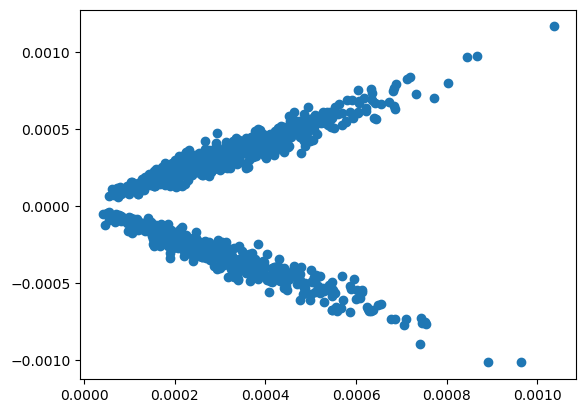

In [33]:
plt.scatter(brcaPackageMI, balajiMPS["MI_signed"])


In [128]:
balajiMPS["MI_signed"]

0      -0.000325
1      -0.000232
2      -0.000257
3       0.000276
4       0.000233
          ...   
1057    0.000238
1058    0.000492
1059    0.000384
1060    0.000521
1061   -0.000404
Name: MI_signed, Length: 1062, dtype: float64

In [132]:
len(brcaPackageMI)

1062

In [ ]:
# could the randomizations be being thrown off because using mutual informations from wrong patients?
# perhaps. modules are okay, since those are 112 randomizations.
# I think it's the MI calculation that's the problem

In [138]:
randomModules = pd.read_csv("randomizedModules/112_1000.csv")

In [143]:
nullMI = []
for j in range(100):
    for i in range(1062):
        nullMI.append(mutual_info_score(b.iloc[:,i], randomModules.iloc[:,j]))

In [149]:
nullMI = pd.DataFrame(nullMI)
nullMI

,0
0,0.000234
1,0.000120
2,0.000215
3,0.000205
4,0.000178
...,...
106195,0.000299
106196,0.000412
106197,0.000274
106198,0.000354


In [34]:
brcaPackageMI

[0.0002406425946847048,
 0.00020848779188808357,
 0.00016733524739796822,
 0.00026163089903886343,
 0.00023709403587475822,
 8.337136481562568e-05,
 0.00020268208254347816,
 0.0003479912686464091,
 0.00045455019354365004,
 0.00024122864454424959,
 0.0006182394840767969,
 0.0004294160291378052,
 0.0006033705993451831,
 0.0002841718850810147,
 0.0004200456836569483,
 0.0002770980479134266,
 0.0005567699807012578,
 0.00030026664903829835,
 0.00031117979994020216,
 0.0005110762203427001,
 0.00036335494776399335,
 0.0002824021274072451,
 0.0005462761701981716,
 0.0005953554267716895,
 0.0005539866967206285,
 0.0003039663248007151,
 0.0002656055079196633,
 0.0005180729076319462,
 0.00019118123609227497,
 0.0004409339024640975,
 0.000330108061863485,
 0.00011788771687056953,
 6.605105973106354e-05,
 0.00018467637474116946,
 0.00026482477917960873,
 0.00038045694587040754,
 0.0003872700411599768,
 0.0002659611303230669,
 0.00018521790771434824,
 0.0004429935378718534,
 0.0003520449205199499,
 

In [147]:
def zScorewithNull(calcMI, nullMIScores): 
    val = ( (calcMI - nullMIScores.mean()) / nullMIScores.std() ) 
    return val

In [15]:
brcaPackageMI = pd.DataFrame(brcaPackageMI)
val = zScorewithNull(brcaPackageMI, nullMI)
val = pd.DataFrame(val.clip(lower = 0))

NameError: name 'brcaPackageMI' is not defined

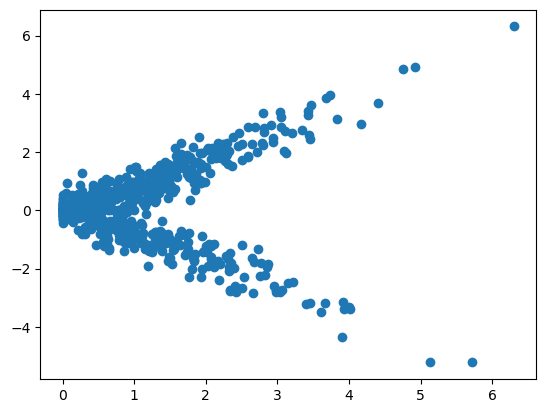

In [156]:
plt.scatter(val, balajiMPS["MPS"])

In [14]:
val

NameError: name 'val' is not defined

In [206]:
df = pyreadr.read_r("brca_quant_0.1_primary_zscore")
df = df[None]
df

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6,gene
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,0.481291,0.652369,1.491583,0.292675,0.815615,0.470376,0.512949,1.205024,-1.319772,0.014864,...,0.988173,2.417477,1.854820,-0.404820,1.574154,0.626233,0.667675,1.394561,0.774441,A1BG
A1BG-AS1,0.257242,1.578377,0.812314,-0.091635,0.829827,0.346237,1.321719,-0.066472,-1.267525,0.144329,...,-0.253697,0.294729,1.758155,-0.471068,0.785424,-0.103944,0.524053,0.826002,0.590553,A1BG-AS1
A2M,-0.883824,-0.582299,-0.315506,-0.118233,-0.246522,0.152814,0.470081,-1.663932,1.455053,1.130240,...,-1.775928,-0.799201,0.783823,-0.423210,-1.100090,0.917164,0.513538,1.605713,-0.562868,A2M
A2M-AS1,0.497894,0.240149,-0.656611,-0.724731,0.331286,0.460109,0.008953,-0.706503,0.084426,0.732840,...,-1.930025,0.389484,1.208861,0.702081,0.762677,0.137989,0.234055,2.367656,-1.535826,A2M-AS1
A2ML1,-0.569646,-0.477235,-0.621590,-0.565880,-0.506694,-0.578896,-0.483883,-0.621590,-0.516945,-0.379271,...,-0.621590,-0.257364,-0.568210,-0.621590,-0.418722,-0.606613,0.304963,-0.544560,-0.476757,A2ML1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,1.400645,1.014184,1.667100,0.810533,-1.424398,-1.342736,-0.387677,-1.986308,-1.247298,-0.806563,...,-1.550665,-0.849619,0.425377,-0.649624,0.197398,-1.137041,0.723603,-0.506543,0.656583,ZYG11A
ZYG11B,1.096770,-0.843968,-1.091775,-0.957145,-0.213595,-0.703212,-1.222008,-2.128246,1.182275,0.171178,...,-1.189224,-2.536962,-1.015376,-3.541958,-2.531822,-0.400243,-0.454945,-1.491644,-0.860798,ZYG11B
ZYX,0.136416,0.985595,1.029660,0.948146,0.304849,0.401936,0.537199,0.087375,1.175708,0.109810,...,0.891594,0.873414,1.123915,1.131169,2.433873,0.919258,0.842827,1.234333,0.038766,ZYX


In [165]:
d = b.iloc[:, 1062]

In [173]:
d = pd.DataFrame(d)
d.iloc[:, 0]

rownames
A1BG        0
A1BG-AS1    0
A2M         0
A2M-AS1     0
A2ML1       0
           ..
ZYG11A      0
ZYG11B      0
ZYX         0
ZZEF1       0
ZZZ3        0
Name: myModule, Length: 17731, dtype: int64

In [180]:
def calcMPS(allMI, nullMIScores, df, moduleDF, moduleNum = 0):
    #z scoring mutual information based off null distribution
    val = zScorewithNull(allMI, nullMIScores)

    # makes every value less than zero, zero
    val = pd.DataFrame(val.clip(lower = 0))

    # for idx in range(len(val)):
    #     matrix = np.corrcoef(moduleDF.iloc[:,moduleNum],df.iloc[:,idx])
    #     if matrix[0][1] < 0:
    #         val.iloc[idx,0] = val.iloc[idx,0] * -1
            
    
    return val

In [181]:
signedMPS = calcMPS(brcaPackageMI, nullMI, df, d)

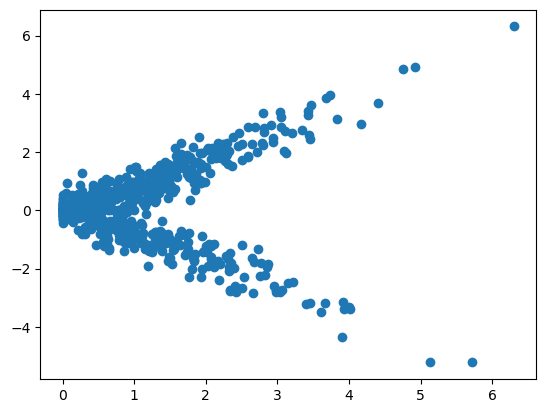

In [182]:
plt.scatter(signedMPS, balajiMPS['MPS'])

In [183]:
print(d.iloc[:,0])

rownames
A1BG        0
A1BG-AS1    0
A2M         0
A2M-AS1     0
A2ML1       0
           ..
ZYG11A      0
ZYG11B      0
ZYX         0
ZZEF1       0
ZZZ3        0
Name: myModule, Length: 17731, dtype: int64


In [185]:
df.iloc[:,0]

rownames
A1BG        0.481291
A1BG-AS1    0.257242
A2M        -0.883824
A2M-AS1     0.497894
A2ML1      -0.569646
              ...   
ZYG11A      1.400645
ZYG11B      1.096770
ZYX         0.136416
ZZEF1       1.305175
ZZZ3        0.785609
Name: TCGA-3C-AAAU, Length: 17731, dtype: float64

In [187]:
val

,0
0,0.000000
1,0.000000
2,0.000000
3,0.012244
4,0.000000
...,...
1057,0.000000
1058,1.683188
1059,0.661341
1060,1.889855


In [202]:
np.corrcoef(df.iloc[:,0])

In [209]:
df2["MI"] = b["myModule"]

In [210]:
d

rownames,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AACSP1,AADAC,...,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,MI
TCGA-3C-AAAU,0.481291,0.257242,-0.883824,0.497894,-0.569646,-1.609783,-0.020127,0.302038,-0.040482,-0.458092,...,0.019645,1.886760,1.408365,1.761370,1.400645,1.096770,0.136416,1.305175,0.785609,NaN
TCGA-3C-AALI,0.652369,1.578377,-0.582299,0.240149,-0.477235,-0.680379,0.821900,-0.400035,3.565652,-0.274549,...,2.210402,-0.019531,-0.277815,0.786604,1.014184,-0.843968,0.985595,0.332340,-1.693009,NaN
TCGA-3C-AALJ,1.491583,0.812314,-0.315506,-0.656611,-0.621590,1.065609,0.236412,0.987928,0.193235,-0.300015,...,-0.731077,-1.000079,0.112206,-1.110608,1.667100,-1.091775,1.029660,-0.371431,-1.140528,NaN
TCGA-3C-AALK,0.292675,-0.091635,-0.118233,-0.724731,-0.565880,0.787429,0.210182,-0.454197,-0.314607,-0.011882,...,-0.341663,-0.297595,-0.421517,-0.977482,0.810533,-0.957145,0.948146,-0.981717,-0.614762,NaN
TCGA-4H-AAAK,0.815615,0.829827,-0.246522,0.331286,-0.506694,0.321084,0.537555,-0.400946,-0.233138,-0.385400,...,-0.177952,-0.441972,-0.393770,-0.116202,-1.424398,-0.213595,0.304849,-0.733927,-0.006238,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,1.574154,0.785424,-1.100090,0.762677,-0.418722,0.356519,1.940513,-1.000828,-0.314607,-0.322374,...,-2.352482,-1.707242,-1.467321,-1.265376,0.197398,-2.531822,2.433873,-0.856180,-1.551168,NaN
TCGA-XX-A899,0.626233,-0.103944,0.917164,0.137989,-0.606613,0.911163,0.205454,0.399824,-0.235569,0.245190,...,0.187706,0.438117,0.500090,0.727331,-1.137041,-0.400243,0.919258,1.312665,-0.509131,NaN
TCGA-XX-A89A,0.667675,0.524053,0.513538,0.234055,0.304963,1.038967,0.670654,-0.467555,-0.314607,1.294326,...,0.294214,-0.564496,-0.911807,0.653443,0.723603,-0.454945,0.842827,0.390760,0.043597,NaN
TCGA-Z7-A8R5,1.394561,0.826002,1.605713,2.367656,-0.544560,0.609112,1.098664,-0.049056,-0.314607,-0.182370,...,-2.176522,-1.350621,-1.537620,-1.367000,-0.506543,-1.491644,1.234333,-1.123844,-0.524120,NaN


In [213]:
df["myMI"]  = b["myModule"]

In [214]:
df

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6,gene,myMI
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,0.481291,0.652369,1.491583,0.292675,0.815615,0.470376,0.512949,1.205024,-1.319772,0.014864,...,2.417477,1.854820,-0.404820,1.574154,0.626233,0.667675,1.394561,0.774441,A1BG,0.0
A1BG-AS1,0.257242,1.578377,0.812314,-0.091635,0.829827,0.346237,1.321719,-0.066472,-1.267525,0.144329,...,0.294729,1.758155,-0.471068,0.785424,-0.103944,0.524053,0.826002,0.590553,A1BG-AS1,0.0
A2M,-0.883824,-0.582299,-0.315506,-0.118233,-0.246522,0.152814,0.470081,-1.663932,1.455053,1.130240,...,-0.799201,0.783823,-0.423210,-1.100090,0.917164,0.513538,1.605713,-0.562868,A2M,0.0
A2M-AS1,0.497894,0.240149,-0.656611,-0.724731,0.331286,0.460109,0.008953,-0.706503,0.084426,0.732840,...,0.389484,1.208861,0.702081,0.762677,0.137989,0.234055,2.367656,-1.535826,A2M-AS1,0.0
A2ML1,-0.569646,-0.477235,-0.621590,-0.565880,-0.506694,-0.578896,-0.483883,-0.621590,-0.516945,-0.379271,...,-0.257364,-0.568210,-0.621590,-0.418722,-0.606613,0.304963,-0.544560,-0.476757,A2ML1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,1.400645,1.014184,1.667100,0.810533,-1.424398,-1.342736,-0.387677,-1.986308,-1.247298,-0.806563,...,-0.849619,0.425377,-0.649624,0.197398,-1.137041,0.723603,-0.506543,0.656583,ZYG11A,0.0
ZYG11B,1.096770,-0.843968,-1.091775,-0.957145,-0.213595,-0.703212,-1.222008,-2.128246,1.182275,0.171178,...,-2.536962,-1.015376,-3.541958,-2.531822,-0.400243,-0.454945,-1.491644,-0.860798,ZYG11B,0.0
ZYX,0.136416,0.985595,1.029660,0.948146,0.304849,0.401936,0.537199,0.087375,1.175708,0.109810,...,0.873414,1.123915,1.131169,2.433873,0.919258,0.842827,1.234333,0.038766,ZYX,0.0


In [215]:
df.drop(columns = ['gene'], inplace = True)

In [219]:
correlation_df = df.corr(method = 'pearson')

In [232]:
# correlation_df.drop(index = ["myMI"], inplace = True)
correlation_df = correlation_df.filter(items = balajiMPS['sample_TCGA'])


correlation_df

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-S3-AA15,TCGA-S3-AA17,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6
TCGA-3C-AAAU,1.000000,0.139351,0.184182,0.008168,0.007545,0.010611,-0.110892,0.123424,-0.002921,-0.054112,...,-0.097735,0.055875,0.119446,0.007689,0.037756,0.142135,-0.020521,-0.079378,-0.111064,0.074450
TCGA-3C-AALI,0.139351,1.000000,0.277281,0.203443,0.044713,0.047225,0.130879,0.152635,-0.126776,-0.144720,...,0.131150,0.180292,0.240734,0.193236,0.227403,0.119465,0.011100,0.035135,0.111235,0.144710
TCGA-3C-AALJ,0.184182,0.277281,1.000000,0.270508,0.117733,0.182176,0.142996,0.145010,-0.167423,-0.160578,...,0.185304,0.136762,0.295938,0.180448,0.306062,0.184429,0.078774,0.106766,0.227007,0.250255
TCGA-3C-AALK,0.008168,0.203443,0.270508,1.000000,0.377676,0.409678,0.267189,0.033983,-0.032143,-0.049403,...,0.169572,0.087698,0.174494,0.070181,0.340036,0.350846,0.190406,0.160110,0.301007,0.227446
TCGA-4H-AAAK,0.007545,0.044713,0.117733,0.377676,1.000000,0.435674,0.237404,-0.024534,0.111788,0.009279,...,0.097088,0.042673,-0.017587,-0.083927,0.210699,0.355976,0.278849,0.223913,0.191270,0.166924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,-0.086597,0.150812,0.245481,0.271351,0.187644,0.322689,0.328002,0.122611,-0.081987,-0.119606,...,0.118746,0.029843,0.212630,0.215592,0.464539,0.484343,0.088458,0.133714,0.518888,0.137437
TCGA-XX-A899,-0.020521,0.011100,0.078774,0.190406,0.278849,0.239490,0.217888,-0.143177,0.071463,0.057950,...,0.396218,0.242115,-0.158102,-0.131588,-0.026576,0.211057,1.000000,0.417812,0.148269,-0.143249
TCGA-XX-A89A,-0.079378,0.035135,0.106766,0.160110,0.223913,0.214529,0.172102,-0.185086,0.036366,0.123919,...,0.333559,0.110327,-0.096261,-0.089477,0.038049,0.152708,0.417812,1.000000,0.163459,-0.091103
TCGA-Z7-A8R5,-0.111064,0.111235,0.227007,0.301007,0.191270,0.462665,0.478001,0.137275,-0.069087,-0.179129,...,0.318169,0.012979,0.259388,0.250203,0.624879,0.471093,0.148269,0.163459,1.000000,0.150421


In [230]:
len(correlation_list)

1093

In [223]:
val

,0
0,0.000000
1,0.000000
2,0.000000
3,0.012244
4,0.000000
...,...
1057,0.000000
1058,1.683188
1059,0.661341
1060,1.889855
